In [1]:
import numpy as np
import pandas as pd
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None,na_values=" ?")
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None,na_values=" ?")

In [2]:
train_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education','education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [4]:
train_set.shape

(32561, 15)

In [5]:
train_set.dropna(inplace=True)

In [6]:
test_set.dropna(inplace=True)

In [7]:
test_set.shape

(15060, 15)

In [8]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [10]:
train_set.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [20]:
train_set.hours_per_week.unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 43, 38, 55,
       48, 58, 32, 70, 22, 56, 41, 28, 36, 24, 46,  2, 42, 12, 65,  1, 34,
       75, 98, 33, 54, 10,  6, 64, 19, 18, 72,  8,  9, 47, 37, 21, 26, 14,
        5,  7, 99, 53, 39, 62, 59, 57, 78, 90, 66, 11, 49, 84, 17, 68,  3,
       27, 85, 31, 51, 77, 63, 23,  4, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [13]:
train_set.education_num.unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2],
      dtype=int64)

In [12]:
train_set[['education','education_num']]

,education,education_num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
32556,Assoc-acdm,12
32557,HS-grad,9
32558,HS-grad,9
32559,HS-grad,9


In [15]:
train_set.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [16]:
train_set.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [17]:
train_set.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [18]:
!pip install seaborn
import seaborn as sns

  Using cached pandas-1.3.2-cp39-cp39-win_amd64.whl (10.2 MB)
  Using cached numpy-1.21.2-cp39-cp39-win_amd64.whl (14.0 MB)
  Using cached scipy-1.7.1-cp39-cp39-win_amd64.whl (33.8 MB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)


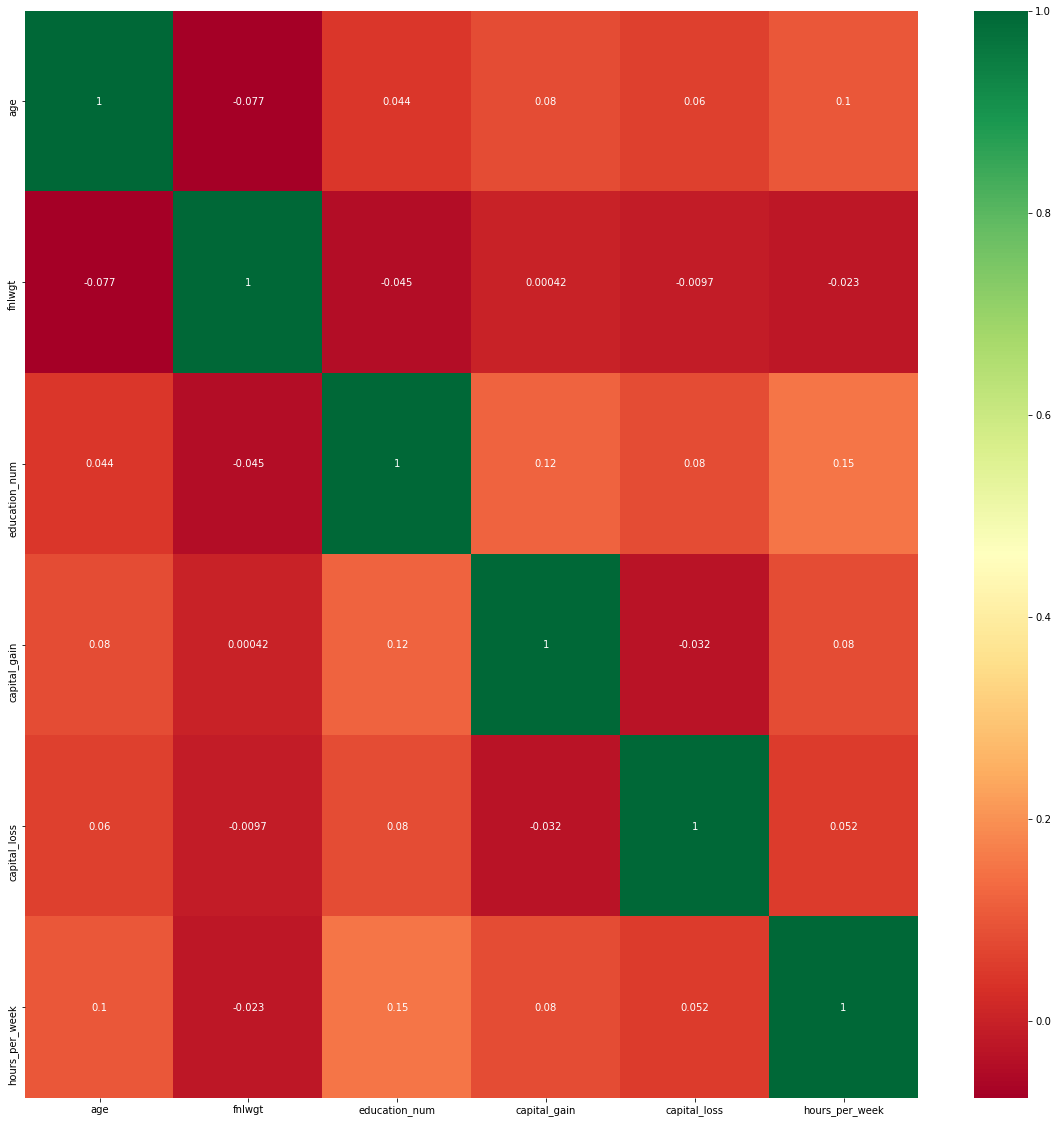

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
#get correlations of each features in dataset
corrmat = train_set.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_set[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [20]:
numerical_features=list(train_set.select_dtypes(exclude='object').columns)

In [21]:
numerical_features

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

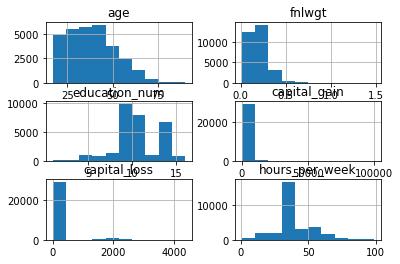

In [22]:
from matplotlib import pyplot
s=train_set[numerical_features]
s.hist()
pyplot.show()

In [23]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
df_train=train_set.copy()
df_test=test_set.copy()

In [26]:
df_train.workclass.value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [27]:
l=list(df_train.workclass)

In [29]:
l1=[]
for i in l:
    if (i==' State-gov' or i==' Local-gov' or i==' Federal-gov'):
        l1.append('Goveronment')
    if i==' Self-emp-not-inc' or i==' Self-emp-inc':
        l1.append('Self-Employed')
    if i==' Without-pay':
        l1.append('Others')
    if i==' Private':
        l1.append('Private')
df_train.workclass=l1

In [30]:
df_train.workclass.value_counts()

Private          22286
Goveronment       4289
Self-Employed     3573
Others              14
Name: workclass, dtype: int64

In [31]:
l=list(df_test.workclass)

In [32]:
l1=[]
for i in l:
    if (i==' State-gov' or i==' Local-gov' or i==' Federal-gov'):
        l1.append('Goveronment')
    if i==' Self-emp-not-inc' or i==' Self-emp-inc':
        l1.append('Self-Employed')
    if i==' Without-pay':
        l1.append('Others')
    if i==' Private':
        l1.append('Private')
df_test.workclass=l1

In [33]:
df_test.workclass.value_counts()

Private          11021
Goveronment       2163
Self-Employed     1869
Others               7
Name: workclass, dtype: int64

In [35]:
df_train.marital_status.value_counts()

 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital_status, dtype: int64

In [36]:
l=list(df_train.marital_status)

In [37]:
l1=[]
for i in l:
    if i ==' Married-civ-spouse' or i==' Married-spouse-absent' or i==' Married-AF-spouse':
        l1.append('Married')
    if i==' Never-married':
        l1.append('Single')
    if i==' Separated':
        l1.append('Seperated')
    if i==' Widowed':
        l1.append('Widowed')
    if i==' Divorced':
        l1.append('Divorced')
df_train.marital_status=l1

In [38]:
df_train.marital_status.value_counts()

Married      14456
Single        9726
Divorced      4214
Seperated      939
Widowed        827
Name: marital_status, dtype: int64

In [39]:
l=list(df_test.marital_status)

In [40]:
l1=[]
for i in l:
    if i ==' Married-civ-spouse' or i==' Married-spouse-absent' or i==' Married-AF-spouse':
        l1.append('Married')
    if i==' Never-married':
        l1.append('Single')
    if i==' Separated':
        l1.append('Seperated')
    if i==' Widowed':
        l1.append('Widowed')
    if i==' Divorced':
        l1.append('Divorced')
df_test.marital_status=l1

In [41]:
df_test.marital_status.value_counts()

Married      7183
Single       4872
Divorced     2083
Seperated     472
Widowed       450
Name: marital_status, dtype: int64

In [42]:
df_train.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [43]:
l=list(df_train.occupation)

In [44]:
l1=[]
for i in l:
    if i ==' Adm-clerical' or i==' Exec-managerial':
        l1.append('White-collar')
    if i==' Craft-repair' or i==' Farming-fishing' or i==' Handlers-cleaners' or i==' Machine-op-inspct' or i==' Transport-moving':
        l1.append('Blue-collar')
    if i==' Other-service' or i==' Priv-house-serv' or i==' Protective-serv' or i==' Tech-support':
        l1.append('Service')
    if i==' Prof-specialty':
        l1.append('Professional')
    if i==' Armed-Forces':
        l1.append('Armed-Forces')
    if i==' Sales':
        l1.append('Sales')
df_train.occupation=l1

In [45]:
df_train.occupation.value_counts()

Blue-collar     9907
White-collar    7713
Service         4911
Professional    4038
Sales           3584
Armed-Forces       9
Name: occupation, dtype: int64

In [46]:
l=list(df_test.occupation)

In [47]:
l1=[]
for i in l:
    if i ==' Adm-clerical' or i==' Exec-managerial':
        l1.append('White-collar')
    if i==' Craft-repair' or i==' Farming-fishing' or i==' Handlers-cleaners' or i==' Machine-op-inspct' or i==' Transport-moving':
        l1.append('Blue-collar')
    if i==' Other-service' or i==' Priv-house-serv' or i==' Protective-serv' or i==' Tech-support':
        l1.append('Service')
    if i==' Prof-specialty':
        l1.append('Professional')
    if i==' Armed-Forces':
        l1.append('Armed-Forces')
    if i==' Sales':
        l1.append('Sales')
df_test.occupation=l1

In [48]:
df_test.occupation.value_counts()

Blue-collar     4925
White-collar    3811
Service         2525
Professional    1970
Sales           1824
Armed-Forces       5
Name: occupation, dtype: int64

In [49]:
df_train.race.value_counts()

 White                 25933
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

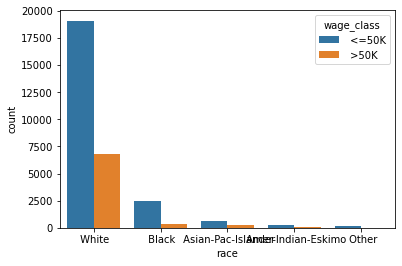

In [50]:
sns.countplot(data=df_train,x='race',hue='wage_class',orient='h')

In [51]:
df_train.drop(columns=['fnlwgt','education','relationship','capital_gain','capital_loss','native_country'],inplace=True)

In [52]:
df_test.drop(columns=['fnlwgt','education','relationship','capital_gain','capital_loss','native_country'],inplace=True)

In [53]:
df_train.head()

,age,workclass,education_num,marital_status,occupation,race,sex,hours_per_week,wage_class
0,39,Goveronment,13,Single,White-collar,White,Male,40,<=50K
1,50,Self-Employed,13,Married,White-collar,White,Male,13,<=50K
2,38,Private,9,Divorced,Blue-collar,White,Male,40,<=50K
3,53,Private,7,Married,Blue-collar,Black,Male,40,<=50K
4,28,Private,13,Married,Professional,Black,Female,40,<=50K


In [54]:
df_test.head()

,age,workclass,education_num,marital_status,occupation,race,sex,hours_per_week,wage_class
0,25,Private,7,Single,Blue-collar,Black,Male,40,<=50K.
1,38,Private,9,Married,Blue-collar,White,Male,50,<=50K.
2,28,Goveronment,12,Married,Service,White,Male,40,>50K.
3,44,Private,10,Married,Blue-collar,Black,Male,40,>50K.
5,34,Private,6,Single,Service,White,Male,30,<=50K.


In [55]:
l=list(df_train.wage_class)

In [56]:
l1=[]
for i in l:
    if i==" <=50K":
        l1.append(0)
    else:
        l1.append(1)
df_train.wage_class=l1

In [58]:
df_test.drop(columns=['wage_class'],inplace=True)

In [59]:
df_test.head()

,age,workclass,education_num,marital_status,occupation,race,sex,hours_per_week
0,25,Private,7,Single,Blue-collar,Black,Male,40
1,38,Private,9,Married,Blue-collar,White,Male,50
2,28,Goveronment,12,Married,Service,White,Male,40
3,44,Private,10,Married,Blue-collar,Black,Male,40
5,34,Private,6,Single,Service,White,Male,30


In [60]:
numerical_features=['age', 'education_num', 'hours_per_week']
numerical_features

['age', 'education_num', 'hours_per_week']

In [61]:
ordinal_features=['workclass','marital_status','occupation','race','sex']

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [78]:
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [79]:
nominal_transformer=Pipeline(steps=[('nominal',OneHotEncoder())])
ordinal_transformer=Pipeline(steps=[('Label',MultiColumnLabelEncoder())])
numerical_transformer=Pipeline(steps=[('Numerical',StandardScaler())])

In [80]:
preprocessor1=ColumnTransformer(transformers=[
      ('T1',ordinal_transformer,ordinal_features),
      ('T2',numerical_transformer,numerical_features),
      ('T3',nominal_transformer,ordinal_features)
      ],sparse_threshold=0)

In [81]:
from sklearn.model_selection import train_test_split
X=df_train.drop(columns=['wage_class'])
y=df_train.wage_class

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
!pip install xgboost

In [84]:
import xgboost as xgb
model = XGBClassifier()

In [85]:
model=Pipeline(steps=[('preprocessor1',preprocessor1),
                ('model',model)
                ])

In [86]:
model.fit(X_train,y_train)

C:\Users\navee\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor1',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('T1',
                                                  Pipeline(steps=[('Label',
                                                                   <__main__.MultiColumnLabelEncoder object at 0x0000018E84ECA760>)]),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'race',
                                                   'sex']),
                                                 ('T2',
                                                  Pipeline(steps=[('Numerical',
                                                                   StandardScaler())]),
                                                  ['age', 'education_num',
                                                   'hours_per_week']),
        

In [87]:
y_pred=model.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [89]:
confusion_matrix(y_test,y_pred)

array([[4178,  325],
       [ 726,  804]], dtype=int64)

In [90]:
accuracy_score(y_test,y_pred)

0.8257914801922758

# hyper parameter tuning

In [139]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
x1 = xgb.XGBClassifier(objective='binary:logistic')
params = {
        'n_estimators': range(60, 220, 40),
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=x1,
    param_grid=params,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 5,
    verbose=True
)

In [140]:
model2=Pipeline(steps=[('preprocessor1',preprocessor1),
                ('model',grid_search)
                ])

In [141]:
model2.fit(X_train,y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


C:\Users\navee\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:57:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor1',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('T1',
                                                  Pipeline(steps=[('Label',
                                                                   <__main__.MultiColumnLabelEncoder object at 0x0000018E84ECA760>)]),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'race',
                                                   'sex']),
                                                 ('T2',
                                                  Pipeline(steps=[('Numerical',
                                                                   StandardScaler())]),
                                                  ['age', 'education_num',
                                                   'hours_per_week']),
        

In [142]:
grid_search.best_score_

0.8853911845137816

In [143]:
y_pred=model2.predict(X_test)

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8342449859108239

In [145]:
import pickle 
pickle.dump(model2,open('hyper1_xgboost_model.pkl','wb'))

In [147]:
test_pred=model2.predict(df_test)

In [148]:
test_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [164]:
testing=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None,na_values=" ?")

In [165]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education','education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']
testing.columns = col_labels

In [166]:
testing.wage_class

0         <=50K.
1         <=50K.
2          >50K.
3          >50K.
4         <=50K.
          ...   
16276     <=50K.
16277     <=50K.
16278     <=50K.
16279     <=50K.
16280      >50K.
Name: wage_class, Length: 16281, dtype: object

In [167]:
testing.dropna(inplace=True)

In [175]:
q=testing.wage_class.map({' <=50K.':0,' >50K.':1})

In [176]:
q=np.array(q)

In [177]:
q

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [178]:
type(test_pred)

numpy.ndarray

In [179]:
accuracy_score(q,test_pred)

0.8310756972111554